In [2]:
import pandas as pd
import seaborn as sns

In [5]:
df = pd.read_csv("dds_datasets/nyt1.csv")
df.shape

(458441, 5)

In [6]:
df.head()

,Age,Gender,Impressions,Clicks,Signed_In
0,36,0,3,0,1
1,73,1,3,0,1
2,30,0,3,0,1
3,49,1,3,0,1
4,47,1,11,0,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458441 entries, 0 to 458440
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   Age          458441 non-null  int64
 1   Gender       458441 non-null  int64
 2   Impressions  458441 non-null  int64
 3   Clicks       458441 non-null  int64
 4   Signed_In    458441 non-null  int64
dtypes: int64(5)
memory usage: 17.5 MB


In [15]:
df.duplicated().sum()

np.int64(453503)

In [16]:
df.isnull().sum()

Age            0
Gender         0
Impressions    0
Clicks         0
Signed_In      0
dtype: int64

In [18]:
df.columns = [col.lower() for col in df]
df

,age,gender,impressions,clicks,signed_in
0,36,0,3,0,1
1,73,1,3,0,1
2,30,0,3,0,1
3,49,1,3,0,1
4,47,1,11,0,1
...,...,...,...,...,...
458436,0,0,2,0,0
458437,0,0,4,0,0
458438,72,1,5,0,1
458439,0,0,5,0,0


In [20]:
bins = [0,18,25,35,45,55,65,110]
labels = ["<18" , "18-24" , "25-34" , "35-44","45-54", "55-64","65+"]
df["age_group"] = pd.cut(df.age , bins , labels=labels, include_lowest= True)
df

,age,gender,impressions,clicks,signed_in,age_group
0,36,0,3,0,1,35-44
1,73,1,3,0,1,65+
2,30,0,3,0,1,25-34
3,49,1,3,0,1,45-54
4,47,1,11,0,1,45-54
...,...,...,...,...,...,...
458436,0,0,2,0,0,<18
458437,0,0,4,0,0,<18
458438,72,1,5,0,1,65+
458439,0,0,5,0,0,<18


<Axes: xlabel='age_group', ylabel='count'>

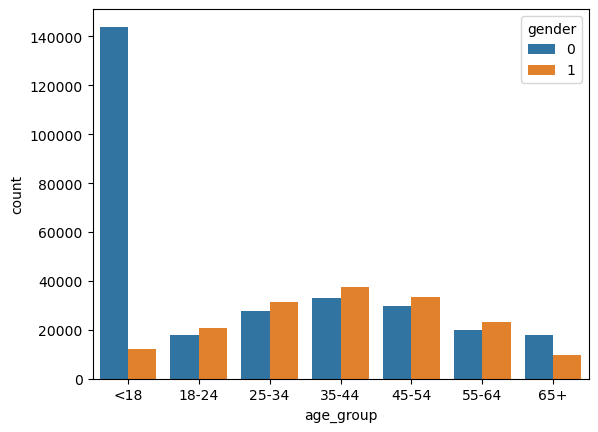

In [23]:
sns.countplot(data=df, x="age_group" ,hue="gender")

<Axes: xlabel='clicks', ylabel='count'>

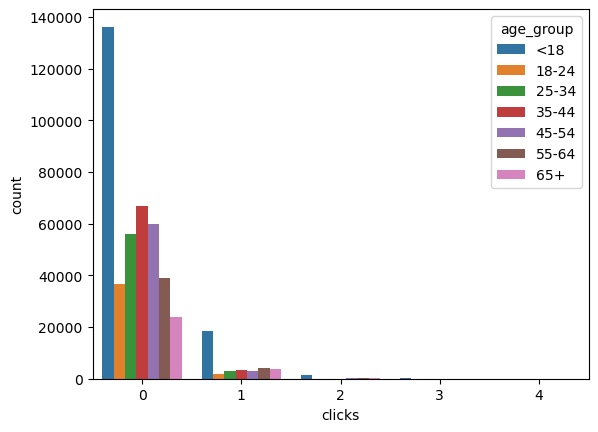

In [24]:
sns.countplot(data=df , x= "clicks" , hue="age_group")

In [25]:
df[(df['clicks']>0) &(df['impressions']==0)] 

,age,gender,impressions,clicks,signed_in,age_group


<Axes: xlabel='impressions', ylabel='Count'>

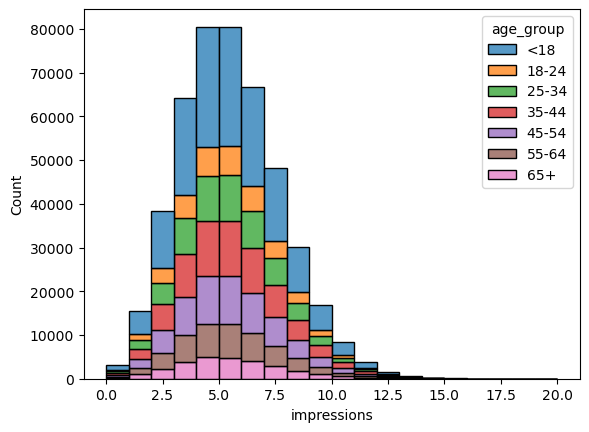

In [26]:
sns.histplot(df , x="impressions" , hue = "age_group", stat="count" , binwidth = 1 , multiple = "stack")

<Axes: xlabel='age_group', ylabel='impressions'>

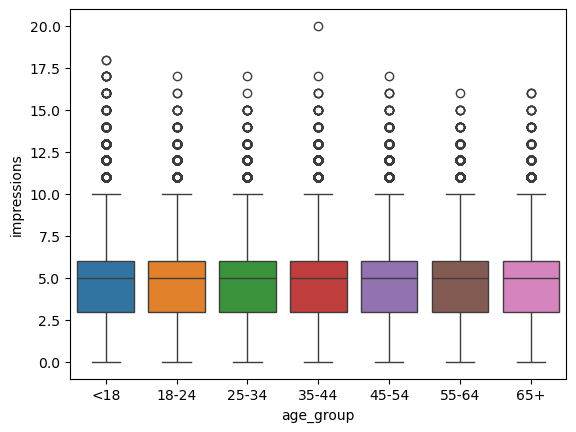

In [30]:
sns.boxplot(data= df, x="age_group", y="impressions" ,hue = "age_group")

In [31]:
df["CTR"] = round(df["clicks"]/df["impressions"], 5)

<Axes: xlabel='age_group', ylabel='CTR'>

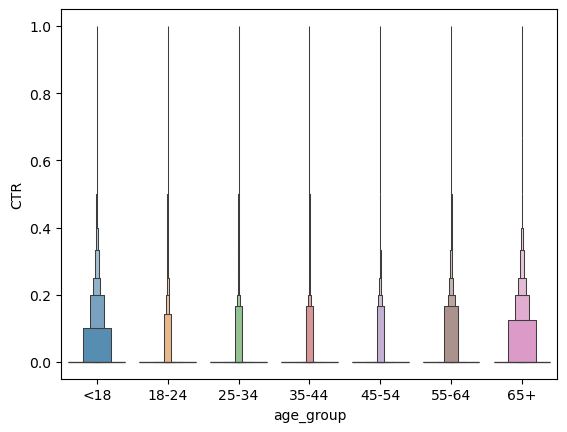

In [32]:
sns.boxenplot(data=df, x="age_group" , y= "CTR", hue= "age_group")

In [34]:
bins = [-1, 0, 0.1, 0.2, 0.4, 1]
labels = ["0", "<10%", "10%-20%", "20%-40%", ">40%"]
df["CTR_group"] = pd.cut(df.CTR, bins , labels=labels)

df.CTR_group.value_counts(normalize=True , sort=True)

CTR_group
0          0.912516
10%-20%    0.054654
20%-40%    0.023328
<10%       0.004996
>40%       0.004506
Name: proportion, dtype: float64

In [35]:
df_clicked = df[df['CTR'] > 0]
df_clicked.head()

,age,gender,impressions,clicks,signed_in,age_group,CTR,CTR_group
5,47,0,11,1,1,45-54,0.09091,<10%
6,0,0,7,1,0,<18,0.14286,10%-20%
10,0,0,8,1,0,<18,0.12500,10%-20%
39,0,0,7,2,0,<18,0.28571,20%-40%
63,0,0,2,1,0,<18,0.50000,>40%


In [36]:
df_clicked.age_group.value_counts(normalize=True)

age_group
<18      0.505723
55-64    0.106757
65+      0.099152
35-44    0.090190
45-54    0.079397
25-34    0.073297
18-24    0.045484
Name: proportion, dtype: float64

<Axes: xlabel='age_group', ylabel='CTR'>

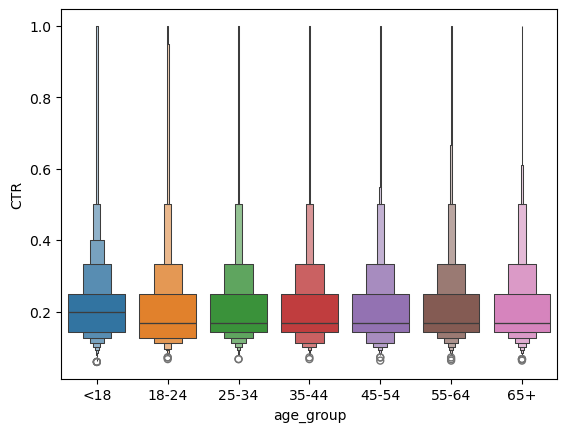

In [39]:
sns.boxenplot(data=df_clicked , x='age_group', y='CTR', hue='age_group')

<Axes: xlabel='age_group', ylabel='count'>

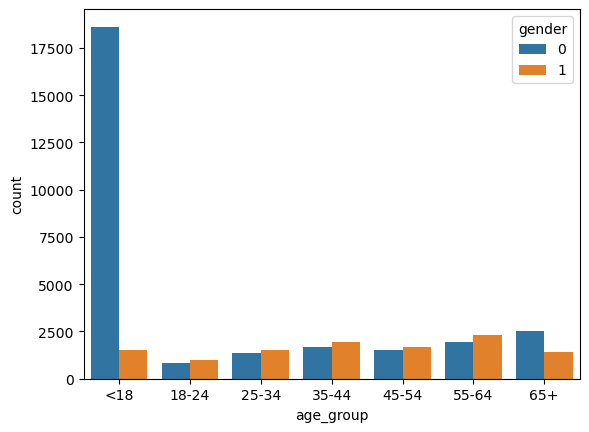

In [40]:
sns.countplot(data=df_clicked, x='age_group', hue="gender")

<Axes: xlabel='age_group', ylabel='count'>

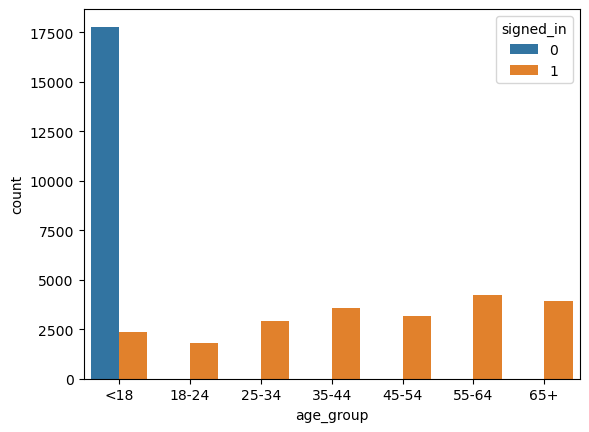

In [41]:
sns.countplot(data=df_clicked, x='age_group', hue="signed_in")